In [1]:
import torch
from torch.nn import Sequential,Linear,Sigmoid,CrossEntropyLoss
import torchvision
import matplotlib.pyplot as plt
import random

In [ ]:
# 데이터 불러오기
train_data=torchvision.datasets.MNIST('./mnist/', train=True, download=True,
                                transform=torchvision.transforms.Compose([
                                torchvision.transforms.ToTensor(),
                                torchvision.transforms.Normalize((0.5,), (0.5,))
                                 ]))
test_data=torchvision.datasets.MNIST('./mnist/', train=False, download=True,
                                transform=torchvision.transforms.Compose([
                                torchvision.transforms.ToTensor(),
                                torchvision.transforms.Normalize((0.5,), (0.5,))
                                ]))

train_data, val_data = torch.utils.data.random_split(train_data, [len(train_data) - 1000, 1000])


In [ ]:
batch_size_train = 100
batch_size_val = 100
batch_size_test = 100

train_loader = torch.utils.data.DataLoader(train_data,batch_size=batch_size_train, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data,batch_size=batch_size_val, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,batch_size=batch_size_test, shuffle=True)

In [ ]:
# 모델 구성

model = Sequential(
          Linear(784, 10, bias=True),
          Sigmoid(),
          Linear(10, 10, bias=True),
          Sigmoid()
          ).to('cuda')

In [ ]:
# Loss, Optimizer 구성

compute_loss = torch.nn.CrossEntropyLoss().to('cuda')
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)


In [ ]:
# Train data로 학습

for epoch in range(10):
    avg_loss = 0
    train_len = len(train_loader)

    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.reshape(-1, 784).to('cuda')
        target = target.to('cuda')

        optimizer.zero_grad()
        output = model(data)
        loss = compute_loss(output, target)
        loss.backward()
        optimizer.step()

        avg_loss += loss / train_len

    print('epoch: %02d,' % (epoch + 1), 'loss = {:.3f}'.format(avg_loss))

print('\nTraining is completed')

epoch: 01, loss = 2.185
epoch: 02, loss = 1.992
epoch: 03, loss = 1.882
epoch: 04, loss = 1.818
epoch: 05, loss = 1.776
epoch: 06, loss = 1.747
epoch: 07, loss = 1.725
epoch: 08, loss = 1.709
epoch: 09, loss = 1.696
epoch: 10, loss = 1.686

Training is completed


In [ ]:
# Validation

correct = 0
total = 0

for data, target in val_loader:
    data = data.reshape(-1, 784).to('cuda')
    target = target.to('cuda')

    pred = model(data)

    correct += (torch.argmax(pred, 1) == target).sum()
    total += len(data)

print('Accuracy: %d / %d'%(correct, total))

Accuracy: 809 / 1000


In [ ]:
# Test accuracy (test_loader 이용하는 방식)

correct = 0
total = 0

with torch.no_grad():
  for batch_idx, (X_test, y_test) in enumerate(test_loader):
      X_test = X_test.reshape(-1, 784).to('cuda')
      y_test = y_test.to('cuda')

      pred = model(X_test)
      # pred의 각 행에서 가장 높은 값의 index 와 y_test가 일치한 개수
      correct += (torch.argmax(pred, 1) == y_test).sum()
      total += len(X_test)

print('Accuracy: %d / %d'%(correct, total))

Accuracy: 8096 / 10000


In [ ]:
# Test accuracy 다른 방식 (test_data 이용하는 방식)

#test data이므로 grad 계산 안함
with torch.no_grad():
    X_test = test_data.data.view(-1, 28*28).float().to('cuda')
    y_test = test_data.targets.to('cuda')

    pred = model(X_test)

    # pred의 각 행에서 가장 높은 값의 index 와 y_test가 일치하면 True 아니면 False
    correct = torch.argmax(pred, 1) == y_test

    print('Accuracy: %d / %d'%(correct.sum(), X_test.shape[0]))

    # accuracy = correct.float().mean()
    # print('Accuracy: %d / %d'%(correct.sum(), X_test.shape[0]), '({:.2f})'.format(accuracy.item()))


Accuracy: 7039 / 10000


Label: 3
Prediction:  3


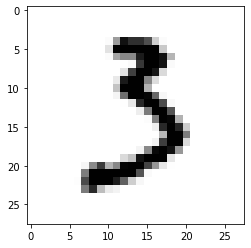

In [ ]:
# 랜덤으로 숫자 뽑아서 test

r = random.randint(0, len(test_data)-1) # 0~9999까지 랜덤한 정수
X_single_data = test_data.data[r].view(-1, 28*28).float().to('cuda')
Y_single_data = test_data.targets[r].to('cuda')

print('Label:', Y_single_data.item())
single_prediction = model(X_single_data)
print('Prediction: ', torch.argmax(single_prediction, 1).item())

plt.imshow(test_data.data[r].view(28,28), cmap='Greys', interpolation='nearest')
plt.show()

In [ ]:

# Validation

correct = 0
total = 0

for data, target in val_loader:
    data = data.reshape(-1, 784).to('cuda')
    target = target.to('cuda')

    pred = model(data)
    # print('======', batch_idx, '=======')
    # print('target: ', target)
    # print(len(target))
    # print('pred: ', torch.argmax(pred, 1))
    # print(len(torch.argmax(pred, 1)))

    correct += (torch.argmax(pred, 1) == target).sum()
    total += len(data)

print('Accuracy: %d / %d'%(correct, total))


Accuracy: 8826 / 10000


In [ ]:
print('train_data: ', len(train_data))
print(type(train_data))
print('train_loader: ', len(train_loader))
print(type(train_loader))



train_data:  59000
<class 'torch.utils.data.dataset.Subset'>
train_loader:  590
<class 'torch.utils.data.dataloader.DataLoader'>


In [ ]:
# # Validation

with torch.no_grad():
  for data, target in test_loader:
    data = data.reshape(-1, 784).to('cpu')
    target = target.to('cpu')

    output = model(data)
    loss = compute_loss(output, target)
    pred = torch.argmax(prediction, 1) == Y_test


    output = network(data)
    test_loss += F.nll_loss(output, target, size_average=False).item()
    pred = output.data.max(1, keepdim=True)[1]
    correct += pred.eq(target.data.view_as(pred)).sum()
test_loss /= len(test_loader.dataset)
test_losses.append(test_loss)
print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
  test_loss, correct, len(test_loader.dataset),
  100. * correct / len(test_loader.dataset)))


          data = data.reshape(-1, 784).to('cpu')
        target = target.to('cpu')

        optimizer.zero_grad()
        hypothesis = model(data)
        loss = compute_loss(hypothesis, target)
        loss.backward()
        optimizer.step()

# #test data이므로 grad 계산 안함
# with torch.no_grad():
#     X_test = test_data.test_data.view(-1, 28*28).float().to('cpu')
#     Y_test = test_data.test_labels.to('cpu')

#     prediction = model(X_test) # (10000, 10)
#     correct_prediction = torch.argmax(prediction, 1) == Y_test
#     # prediction에서 한 행마다 가장 높은 값의 index 와 Y_test가 일치하면 그건 맞다고 판단
#     accuracy = correct_prediction.float().mean()
#     print('Accuracy:', accuracy.item()) 